In [ ]:
# Submitted by:
# ABHISHEK MOURYA
# ROLL:22103004
# Kaggle name : ABHISHEK_MOURYA_04

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#INITIALISING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [6]:
#TRAINING DATA PATH
train_data_path='/content/drive/MyDrive/AS_2_ml_data/train'
test_data_path="/content/drive/MyDrive/AS_2_ml_data/test"

In [7]:
#Loading the data
data_loaded = tf.keras.utils.image_dataset_from_directory(train_data_path)
data_iterator = data_loaded.as_numpy_iterator()

#It is a tuple consisting of data and labels and of size 32
batch = data_iterator.next()

Found 14974 files belonging to 2 classes.


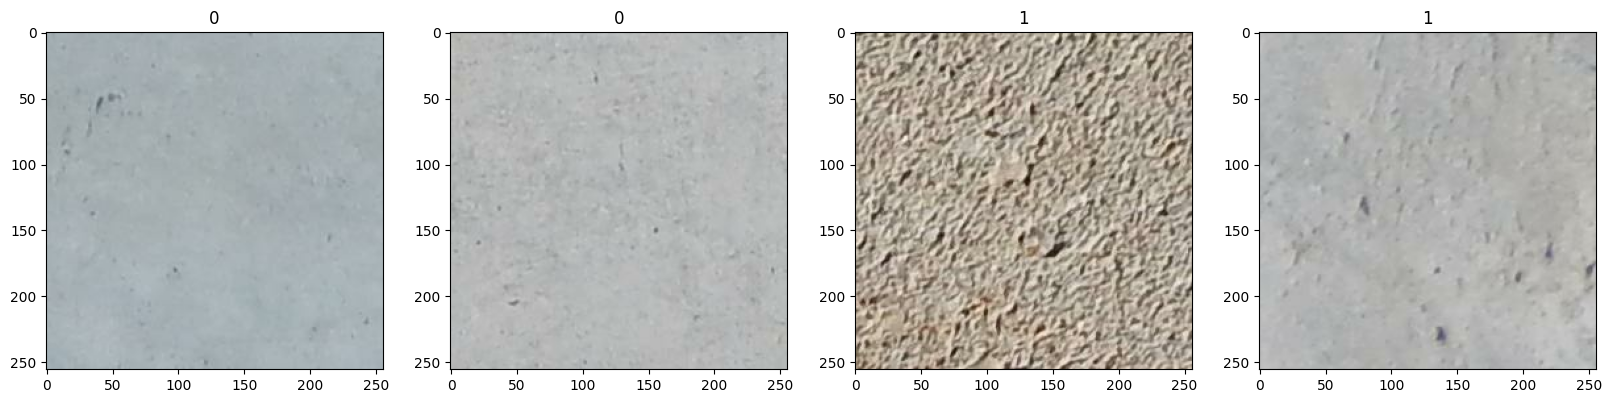

In [8]:
#Showing few images from train folder
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Cracked=0
# Uncracked=1

In [9]:
#Scaling the data for faster calculations
data = data_loaded.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.69803923, 0.7137255 , 0.70980394],
          [0.7137255 , 0.7294118 , 0.7254902 ],
          [0.74509805, 0.7607843 , 0.75686276],
          ...,
          [0.7137255 , 0.7294118 , 0.73333335],
          [0.70980394, 0.7254902 , 0.7294118 ],
          [0.7058824 , 0.72156864, 0.7254902 ]],
 
         [[0.7058824 , 0.72156864, 0.7176471 ],
          [0.69803923, 0.7137255 , 0.70980394],
          [0.7058824 , 0.72156864, 0.7176471 ],
          ...,
          [0.70980394, 0.7254902 , 0.7294118 ],
          [0.70980394, 0.7254902 , 0.7294118 ],
          [0.7058824 , 0.72156864, 0.7254902 ]],
 
         [[0.7176471 , 0.73333335, 0.7294118 ],
          [0.72156864, 0.7372549 , 0.73333335],
          [0.7411765 , 0.75686276, 0.7529412 ],
          ...,
          [0.7058824 , 0.72156864, 0.7254902 ],
          [0.7058824 , 0.72156864, 0.7254902 ],
          [0.7058824 , 0.72156864, 0.7254902 ]],
 
         ...,
 
         [[0.69803923, 0.7137255 , 0.70980394],
          [0.69411

In [10]:
#Splitting the data into train test split

training_size = int(len(data)*.7)  #70% batch for training
validation_size = int(len(data)*.2)    #20% batch for validation
testing_size = int(len(data)*.1)   #10% batch for validation

#Preparing the data   to  feed the model

train = data.take(training_size)
val = data.skip(training_size).take(validation_size)
test = data.skip(training_size+validation_size).take(testing_size)

In [11]:
#Importing necessary libraries for creating machine learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers

In [12]:
#Taking the data from prebuilt model(Mobile net)
from tensorflow.keras.applications import MobileNetV2
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet',input_shape=(256,256,3))
base_model.trainable = False 

#To summarise the model we have taken
base_model.summary() 


9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                

In [13]:
#Creating an Instance of the Model
model = Sequential()

#Transfer learning
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compiling the Model 
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

#Finding the summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 256)               20971776  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                        

In [14]:
#Assigning a path where important metrics will be stored  
logdir='/content/drive/MyDrive/AS_2_ml_data/logs'

#Function in tensorflow to add the history in logdir
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) 
 
#Model Execution /Training of data
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
327/327 [==============================] - 840s 3s/step - loss: 0.8287 - accuracy: 0.7252 - val_loss: 0.4166 - val_accuracy: 0.8065
Epoch 2/10
327/327 [==============================] - 67s 205ms/step - loss: 0.4259 - accuracy: 0.8044 - val_loss: 0.4435 - val_accuracy: 0.8031
Epoch 3/10
327/327 [==============================] - 67s 204ms/step - loss: 0.3543 - accuracy: 0.8416 - val_loss: 0.5159 - val_accuracy: 0.7466
Epoch 4/10
327/327 [==============================] - 68s 206ms/step - loss: 0.2921 - accuracy: 0.8684 - val_loss: 0.4630 - val_accuracy: 0.8088
Epoch 5/10
327/327 [==============================] - 68s 208ms/step - loss: 0.2712 - accuracy: 0.8785 - val_loss: 0.4910 - val_accuracy: 0.7836
Epoch 6/10
327/327 [==============================] - 68s 206ms/step - loss: 0.2271 - accuracy: 0.9017 - val_loss: 0.4833 - val_accuracy: 0.8011
Epoch 7/10
327/327 [==============================] - 68s 206ms/step - loss: 0.1920 - accuracy: 0.9191 - val_loss: 0.5238 - val_accu

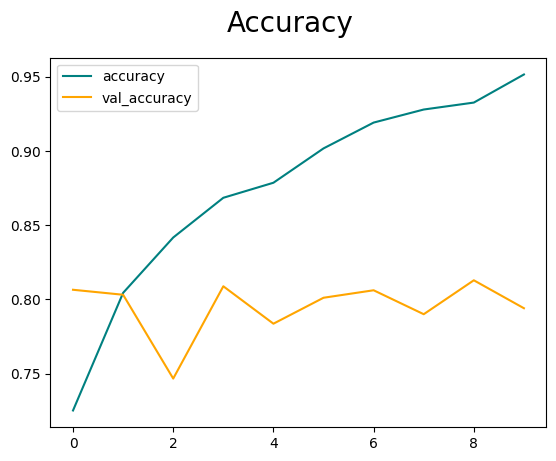

In [16]:
#Plotting the Important parameters
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
#Metrics for Performance of the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(f"Presision: {pre.result()}")
print( f"Recall: {re.result()}")
print(f"Accuracy:{acc.result()}")

1/1 [==============================] - 0s 101ms/step
Presision: 0.7456359267234802
Recall: 0.8125
Accuracy:0.7676630616188049


In [21]:
#Sorting the data
f=[]
for i in os.listdir(test_data_path):
     d,e=i.split('.')
     f.append(int(d))
f.sort()
value=[]
for i in f:
     e=str(i)+'.jpg'
     value.append(e)
value;

In [20]:
#Assigning the test data path
test_data=os.listdir(test_data_path)

#Predictions of our test Images getting appended in the list named pred
pred=[]
for i in value:
       
       img_path=os.path.join("/content/drive/MyDrive/AS_2_ml_data/test/"+str(i))
       image_v=cv2.imread(img_path)
       yhat = model.predict(np.expand_dims(image_v/255, 0))
       if yhat > 0.5:
         pred.append("uncracked")
       else:
         pred.append("cracked")


#Converting our prediction to a csv file and saving it outside

df=pd.DataFrame({"filename":val,"class":pred},columns=["filename","class"])
df=df.set_index("filename")#Setting index as Filename
#  df.head()
df.to_csv("/content/drive/MyDrive/Grid data-20230303T100044Z-001/6_sub.csv")

1/1 [==============================] - 0s 31ms/step
